In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
# load data
data = pd.read_csv('data/OULAD_cleaned_data.csv')
data.head()

,id_student,code_module,code_presentation,total_score*weight,attempted_weight,adjusted_mark,mark,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation
0,6516,AAA,2014J,6350.0,100.0,48.055203,31.8,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,AAA_2014J
1,8462,DDD,2013J,3490.0,40.0,NaN,NaN,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn,DDD_2013J
2,8462,DDD,2014J,4300.0,50.0,NaN,NaN,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn,DDD_2014J
3,11391,AAA,2013J,8240.0,100.0,64.006980,41.2,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA_2013J
4,23629,BBB,2013B,1669.0,25.0,13.803681,8.3,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,Fail,BBB_2013B


In [3]:
# drop null 
data.dropna(inplace=True)
data.shape

(20290, 17)

In [4]:
# adjust IMD band Oct-20 to 10-20%
data["imd_band"] = data["imd_band"].replace('Oct-20', '10-20%')
data.shape


,id_student,code_module,code_presentation,total_score*weight,attempted_weight,adjusted_mark,mark,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation
0,6516,AAA,2014J,6350.0,100.0,48.055203,31.8,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,AAA_2014J
3,11391,AAA,2013J,8240.0,100.0,64.006980,41.2,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA_2013J
4,23629,BBB,2013B,1669.0,25.0,13.803681,8.3,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,Fail,BBB_2013B
5,23698,CCC,2014J,10997.0,150.0,73.300000,55.0,F,East Anglian Region,A Level or Equivalent,50-60%,0-35,0,120,N,Distinction,CCC_2014J
6,23798,BBB,2013J,8924.0,100.0,90.340760,44.6,M,Wales,A Level or Equivalent,50-60%,0-35,0,60,N,Distinction,BBB_2013J


In [20]:
# add percentage
temp_df =  data[["highest_education","final_result"]]
temp_df

,highest_education,final_result
0,HE Qualification,Pass
3,HE Qualification,Pass
4,Lower Than A Level,Fail
5,A Level or Equivalent,Distinction
6,A Level or Equivalent,Distinction
...,...,...
25837,A Level or Equivalent,Distinction
25838,Lower Than A Level,Pass
25840,Lower Than A Level,Pass
25841,Lower Than A Level,Fail


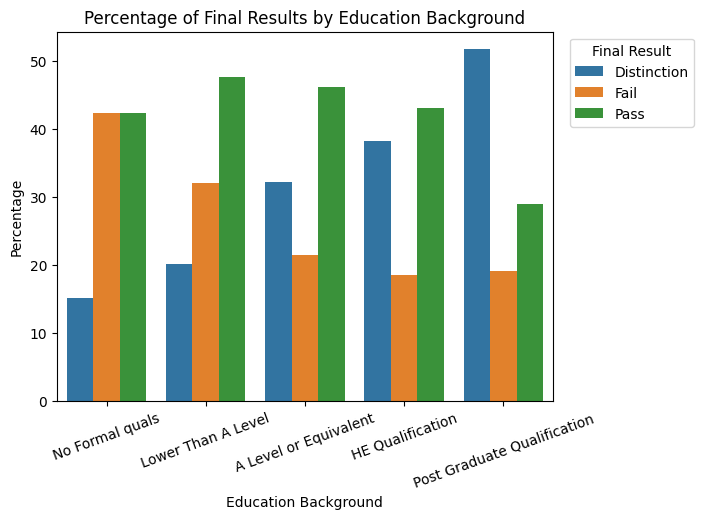

In [25]:
desired_order=["No Formal quals", "Lower Than A Level", "A Level or Equivalent", "HE Qualification", "Post Graduate Qualification"]
# Group the data by education level and final result, and calculate the percentage
grouped_data = temp_df.groupby(['highest_education', 'final_result']).size()
percentage = grouped_data / grouped_data.groupby('highest_education').transform('sum') * 100

# Reset the index of the grouped data
grouped_data = grouped_data.reset_index()
percentage = percentage.reset_index()

# Plot the grouped bar chart
sns.barplot(data=percentage, x='highest_education', y=0, hue='final_result', order=desired_order)
plt.xlabel('Education Background')
plt.ylabel('Percentage')
plt.title('Percentage of Final Results by Education Background')
plt.legend(title='Final Result', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.xticks(rotation=20)

# Show the plot
plt.show()

In [26]:
temp_df2 =  data[["age_band","final_result"]]
temp_df2

,age_band,final_result
0,55<=,Pass
3,55<=,Pass
4,0-35,Fail
5,0-35,Distinction
6,0-35,Distinction
...,...,...
25837,0-35,Distinction
25838,0-35,Pass
25840,0-35,Pass
25841,35-55,Fail


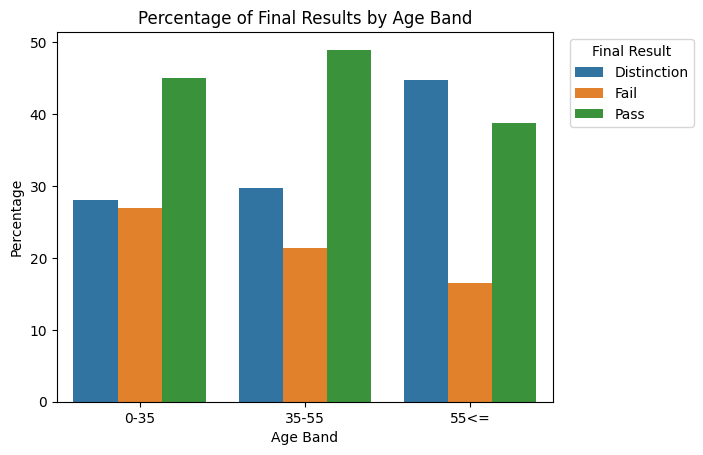

In [27]:
desired_order=["0-35", "35-55", "55<="]
# Group the data by age band and final result, and calculate the percentage
grouped_data = temp_df2.groupby(['age_band', 'final_result']).size()
percentage = grouped_data / grouped_data.groupby('age_band').transform('sum') * 100

# Reset the index of the grouped data
grouped_data = grouped_data.reset_index()
percentage = percentage.reset_index()

# Plot the grouped bar chart
sns.barplot(data=percentage, x='age_band', y=0, hue='final_result', order=desired_order)
plt.xlabel('Age Band')
plt.ylabel('Percentage')
plt.title('Percentage of Final Results by Age Band')
plt.legend(title='Final Result', bbox_to_anchor=(1.02, 1), loc='upper left')

# plt.xticks(rotation=20)

# Show the plot
plt.show()

In [21]:
temp_df3 =  data[["imd_band","final_result"]]
temp_df3

,imd_band,final_result
0,80-90%,Pass
3,90-100%,Pass
4,20-30%,Fail
5,50-60%,Distinction
6,50-60%,Distinction
...,...,...
25837,50-60%,Distinction
25838,60-70%,Pass
25840,50-60%,Pass
25841,50-60%,Fail


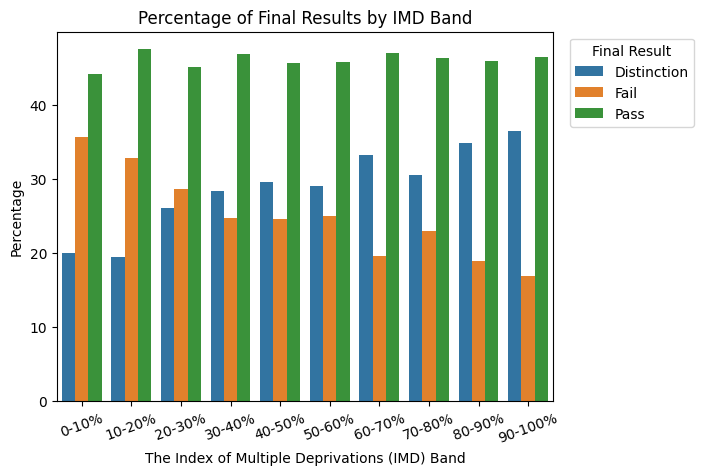

In [22]:
desired_order=["0-10%", "10-20%", "20-30%", "30-40%", "40-50%", "50-60%", "60-70%", "70-80%", "80-90%", "90-100%"]
# Group the data by age band and final result, and calculate the percentage
grouped_data = temp_df3.groupby(['imd_band', 'final_result']).size()
percentage = grouped_data / grouped_data.groupby('imd_band').transform('sum') * 100

# Reset the index of the grouped data
grouped_data = grouped_data.reset_index()
percentage = percentage.reset_index()

# Plot the grouped bar chart
sns.barplot(data=percentage, x='imd_band', y=0, hue='final_result', order=desired_order)
plt.xlabel('The Index of Multiple Deprivations (IMD) Band')
plt.ylabel('Percentage')
plt.title('Percentage of Final Results by IMD Band')
plt.legend(title='Final Result', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.xticks(rotation=20)

# Show the plot
plt.show()

In [6]:
# process data, change string to integer
# change age_band
data["age_band"] = data["age_band"].map({"0-35":1, "35-55":2, "55<=":3})

# preprocess "edu" column
data["highest_education"] = data["highest_education"] .map({"No Formal quals":0, "Lower Than A Level":1, "A Level or Equivalent":2, "HE Qualification":3, "Post Graduate Qualification":4})

# change imd_band 
data["imd_band"] = data["imd_band"].map({"0-10%":0, "10-20%":1, "20-30%":2, "30-40%":3, "40-50%":4, "50-60%":5, "60-70%":6, "70-80%":7, "80-90%":8, "90-100%":9})

# change gender
# data["gender"] = data["gender"].map({"M":1, "F":0})

#change disability
# data["disability"] = data["disability"].map({"N":0, "Y":1})

# change code_module 
data["code_module"] = data["code_module"].map({"AAA":1, "BBB":2, "CCC":3, "DDD":4, "EEE":5, "FFF":6, "GGG":7})

# change code_presentation
# data["code_presentation"] = data["code_presentation"].map({"2013B":1, "2013J":2, "2014B":3, "2014J":4})


data["final_result"] = data["final_result"].map({"Withdrawn":-1,  "Fail":0,  "Pass":1, "Distinction":1})
data.shape

(20290, 17)

In [11]:
# change code_module 
data["code_module"] = data["code_module"].map({"AAA":1, "BBB":2, "CCC":3, "DDD":4, "EEE":5, "FFF":6, "GGG":7})
data.shape

(20290, 17)

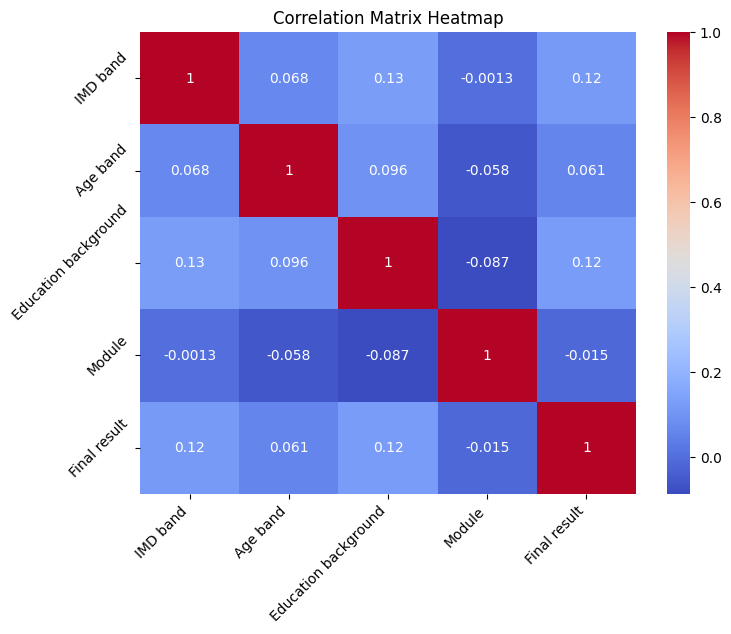

In [12]:
columns = ['imd_band', 'age_band', 'highest_education','code_module', 'final_result']
corr_matrix = data[columns].corr()

# Create a heatmap with improved visualization
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

# Set column names for better readability
ax.set_xticklabels(['IMD band', 'Age band', 'Education background', 'Module', 'Final result'])
ax.set_yticklabels(['IMD band', 'Age band', 'Education background', 'Module', 'Final result'])

# Set plot title
plt.title("Correlation Matrix Heatmap")

# Rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')

# Display the plot
plt.show()
